# Regression

We want to start to take a look at some simple examples of Regression. Especially, I want to encourage you to make yourselves comfortable with using the libraries used here. In particular sklearn, as it is one of the main libraries which is used in Python Machine Learning. I do not want to go into very much detail of the implementation as you should try to work through it by youselves to take away the main points. But of course you should be trying to discuss the code within the course or your model's group.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

# Ordinary Least Squares

In [2]:
e = np.random.normal(0, 0.3, 1000)
x1 = np.random.uniform(0, 1, 1000)
x2 = np.random.uniform(10, 11, 1000)
X = np.array([x1, x2]).transpose()
beta = np.array([1, 1])
y = x1 + x2 + e
# this holds true
# np.dot(X, beta) + e == y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

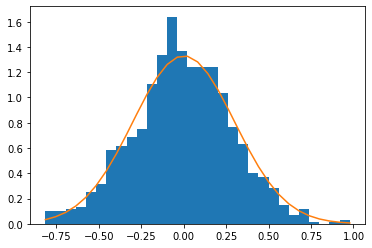

In [3]:
count, bins, ignored = plt.hist(e, 30, density=True)
plt.plot(bins, 1/(0.3 * np.sqrt(2*np.pi)) * np.exp(-1/2 * bins**2/0.3**2))

In [4]:
# this is not normalizing the observations with mean and variance
# this is l2 normalization, ||x||_2 = 1
# sk.preprocessing.normalize(X)

In [5]:
from sklearn.linear_model import LinearRegression
LQ = LinearRegression()
LQ.fit(X_train, y_train)
y_pred_LQ = LQ.predict(X_test)
LQ.coef_

array([1.02109669, 0.99630979])

In [6]:
mse_kq = mean_squared_error(y_pred_LQ, y_test)

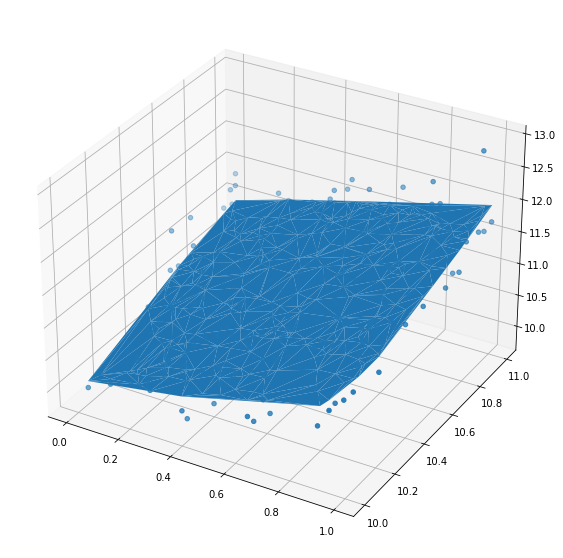

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_test[:,0], X_test[:,1], y_pred_LQ)
ax.scatter(X_test[:,0], X_test[:,1], y_test)

# Ridge penalty

In [8]:
e = np.random.normal(0, 0.3, 1000)
x1 = np.random.uniform(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = np.random.uniform(10, 11, 1000)
x4 = np.random.normal(0, 1, 1000)
X = np.array([x1, x2, x3, x4]).transpose()
beta = np.array([1, 0, 1, 0])
y = x1 + x3 + e
# this holds true
# np.dot(X, beta) + e == y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

## No Cross Validation, etc

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.25)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge.coef_

array([ 1.0189589 , -0.01626731,  1.02319435, -0.00938642])

## K-Fold Cross Validation

In [10]:
from sklearn.model_selection import KFold
KF_CV = KFold(n_splits = 10)

In [11]:
for train_index, test_index in KF_CV.split(X):
    ridge = Ridge(alpha = 0.25)
    ridge.fit(X[train_index, :], y[train_index])
    print(ridge.coef_ - [1, 0, 1, 0])
    pred = ridge.predict(X[test_index, :])
    mse = mean_squared_error(pred, y[test_index])
    print(mse)

[ 0.02411784 -0.00868796  0.00305344 -0.0139184 ]
0.09211376522532044
[ 0.02671729 -0.01079782 -0.01118765 -0.01404828]
0.08725269304212696
[ 2.41517998e-02 -8.40743751e-05  1.35832227e-02 -6.05909904e-03]
0.08584362049748379
[ 0.02860509 -0.01438349  0.00868991 -0.01161434]
0.09143344922111483
[ 0.01998655 -0.00849383 -0.00126736 -0.00910902]
0.10012140925803184
[ 0.02820458 -0.01381325 -0.00376833 -0.00926952]
0.08561957818881354
[ 0.03477721 -0.01779134 -0.00247317 -0.00628021]
0.09519281909845605
[ 0.03092288 -0.00927573  0.01327525 -0.00581761]
0.11105410868006911
[ 0.02899266 -0.01247494  0.00780275 -0.00559275]
0.09307400282470192
[ 0.01127559 -0.01339544  0.0122466  -0.00866208]
0.09718750853217474


## sklearn Cross Validation <font color="red"> What is the difference to above CV?</font>

In [12]:
from sklearn.model_selection import cross_validate
ridge = Ridge()
cross_val = cross_validate(ridge, X, y, cv = 5, scoring='neg_mean_squared_error', return_estimator=True)

In [13]:
cross_val

{'fit_time': array([0.00157857, 0.00089598, 0.00077081, 0.00073075, 0.00063944]),
 'score_time': array([0.00039148, 0.00040913, 0.00031137, 0.0002954 , 0.00029492]),
 'estimator': [Ridge(), Ridge(), Ridge(), Ridge(), Ridge()],
 'test_score': array([-0.09058903, -0.08803178, -0.09311815, -0.10323927, -0.09533156])}

In [26]:
# the following shows that not lambda (the penaltry parameter introduced in theory, which sklearn names alpha) is tuned but its just cv across observations
# how to get the best parameters and hyperparameters?
for i in range(0,5):
    print(cross_val['estimator'][0].get_params()['alpha'])

1.0
1.0
1.0
1.0
1.0


In [27]:
parameters = {'alpha':np.linspace(0, 5, 100)}
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
gs_cv = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error')
gs_cv_fit = gs_cv.fit(X, y, )

In [28]:
est = gs_cv_fit.best_estimator_
print(est.coef_)
print(est.get_params())

[ 1.02603944 -0.01091394  1.00423121 -0.00904588]
{'alpha': 0.25252525252525254, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


# LASSO

In [19]:
from sklearn.linear_model import Lasso, LassoLars
parameters = {'alpha': np.linspace(10e-5, 5, 100)}
lasso = Lasso()
lars = LassoLars()
gs_cv_lasso = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error')
gs_cv_lasso_fit = gs_cv_lasso.fit(X, y)

In [20]:
est_lasso =  gs_cv_lasso_fit.best_estimator_

In [25]:
print('lasso coeffs:\t{} \nlasso alpha:\t{}'.format(est_lasso.coef_, est_lasso.get_params()['alpha']))

lasso coeffs:	[ 1.02792333 -0.01079155  1.00597585 -0.00894359] 
lasso alpha:	0.0001
